# CA6
## Team
### Cano Jeorval
### Catzin Jesus
### Cuevas Danilo
### Robles Jack
### Vives Walter

In [56]:
#importing libraries
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from fancyimpute import KNN
import impyute as impy
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#code to read the csv
fname = 'train.csv'
data = pd.read_csv(fname)
train = data.copy()

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Description

The dataset contains data from the titanic's passangers, the containing of each register and column will be shown during this analysis

In [4]:
#checking to see how many nulll values are
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#general information of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Shape of the datafrane
data_shape = data.shape

print("Rows: ",data_shape[0])
print("Rows: ",data_shape[1])

Rows:  891
Rows:  12


In [7]:
#columns of the dataframe
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
#general description of the data set
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[]

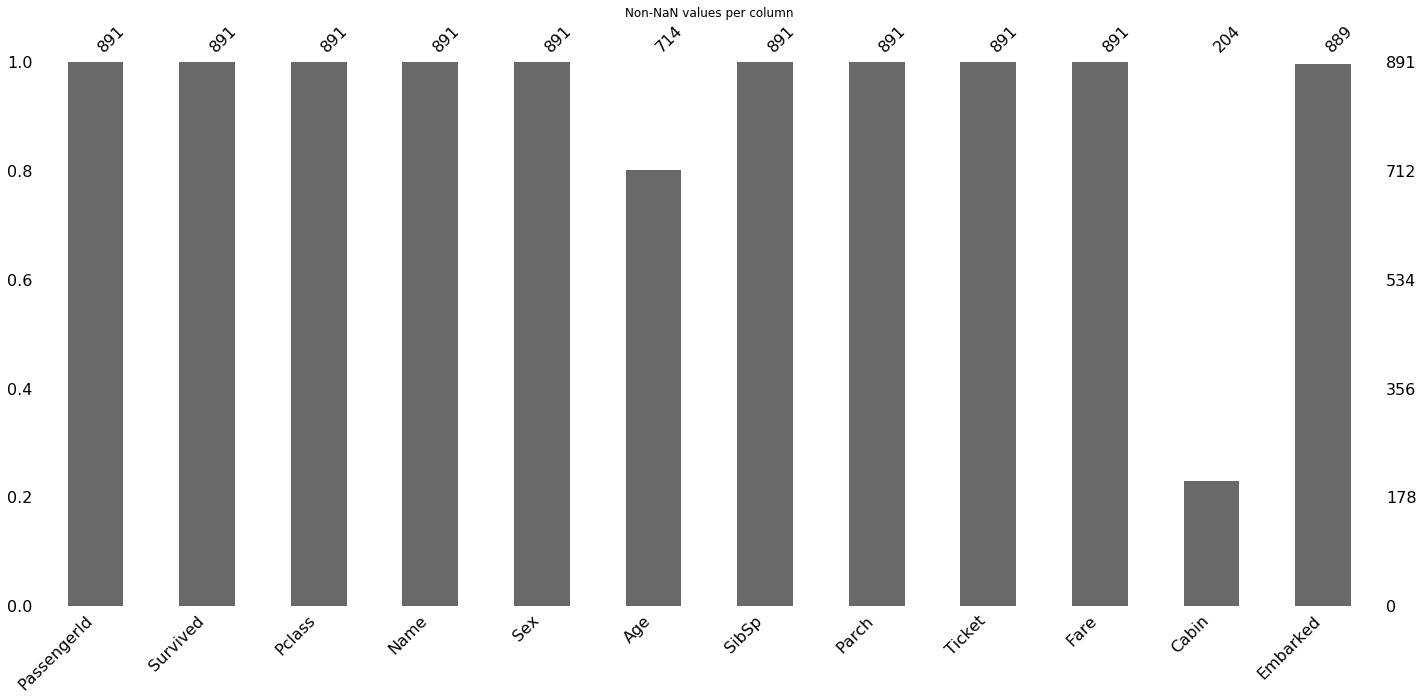

In [9]:
#plotting that Non-NaN values
msno.bar(data, labels = True)
plt.title("Non-NaN values per column")
plt.plot()

In [10]:
print("Percentages of NaN values per column")
(data.isna().sum().values/data.count()).sort_values(ascending = False)

Percentages of NaN values per column


Cabin          3.367647
Age            0.247899
Embarked       0.002250
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

# Methods of deleting
we are avoiding to save the methods of eliminating in order to reuse the variable, and we only print the results, however, if want to we can save it, but we are only showing the methods

## Deleting rows

Deleting all the rows that contains NaN values is one of the methods used, but in this case if you use it, you will lose so many rows and this can affect the results of the prediction or analysis 

In [11]:
#droping rows that contains na values
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Deleting specific Rows

Deleting rows that have more than 4 NaN values, this is useful because you will lose less rows and mantain information that could be important

In [12]:
#droping rows that contains more than 4 na values
data.dropna(thresh=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Deleting columns

Another method is to eliminate columns that contains NaN values, this could be risky because could be columns with only one NaN value and will be eliminated, so this is useful if the columns that will be eliminated are not importan for the analysis or the column contain more NaN values that Non-NaN values

In [13]:
#droping columns that contains na values
data.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


## Mean/Median

Method used to change the NaN values for the mean or median, if there exists outliers, median have to be used in the other hand if there is no outliers, mean can be used

### Checking for outliers

In [14]:
data_median = data.copy()
#calculate the standard deviation and average for age
std_age = data_median.Age.std()
avg_age = data_median.Age.mean()


print('The std. dev is: ', std_age)
print('The average is: ', avg_age)

The std. dev is:  14.526497332334042
The average is:  29.69911764705882


In [15]:
# calculate the upper threshold for an outlier
upper_treshold = avg_age + (2*std_age)
print("The upper treshold for an outlier is: ", upper_treshold)

The upper treshold for an outlier is:  58.752112311726904


In [16]:
# calculate the upper threshold for an outlier
lower_treshold = avg_age - (2*std_age)
print("The upper treshold for an outlier is: ", lower_treshold)

The upper treshold for an outlier is:  0.646122982390736


In [17]:
data_median['Outlier'] = ((data_median.Age > upper_treshold) | (data_median.Age < lower_treshold))

In [18]:
data_median.loc[data_median.Outlier == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Outlier
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S,True
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C,True
94,95,0,3,"Coxon, Mr. Daniel",male,59.00,0,0,364500,7.2500,NaN,S,True
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C,True
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q,True
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.00,0,0,111240,33.5000,B19,S,True
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.00,0,0,237442,13.5000,NaN,S,True
252,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.5500,C87,S,True
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,True
280,281,0,3,"Duane, Mr. Frank",male,65.00,0,0,336439,7.7500,NaN,Q,True


### Using median

Since there is outliers median must be used

In [19]:
print("The median is: ",data_median.Age.median())

The median is:  28.0


In [20]:
#filling the na values for the median of the age column
data_median.Age.fillna(int(data_median.Age.median()),inplace=True)

In [21]:
data_median

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Outlier
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False


In [22]:
print("Changes: ")
print("Mean: ", data_median.Age.mean())
print("Standard Deviation: ", data_median.Age.std())

Changes: 
Mean:  29.36158249158249
Standard Deviation:  13.019696550973201


As we can see the mean did not change a lot and the standard deviation changed a bit 

### Using Mean

Mean for substituing NaN values must be used when there is not outliers, in this dataset are outliers , so this is an example of how could be used it

In [23]:
data_mean = data.copy()

In [24]:
print("The mean is: ",int(data_mean.Age.mean()))

The mean is:  29


In [25]:
#filling the na values for the mean of the age column
data_mean.Age.fillna(int(data_mean.Age.mean()),inplace=True)

In [26]:
data_mean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Mean/Median for each specific class

### using mean

In [27]:
#data per group
data_group = data.copy()

data_group.groupby(["Pclass","Sex"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

As we can see the mean age change not only according to their sex, but also according to Pclass, something we waited because at that time old people were richer than young people

In [28]:
#filling the na values for the mean of the age by Pclass and Sex
ata_group.Age.fillna((data_group.groupby(["Pclass","Sex"])["Age"].transform("mean")).round(0), inplace = True)

In [29]:
data_group.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Using median

In [30]:
#data per group
data_group_median = data.copy()

data_group_median.groupby(["Pclass","Sex"]).median()

PassengerId  Survived   Age  SibSp  Parch      Fare
Pclass Sex                                                        
1      female        447.0       1.0  35.0    0.0    0.0  82.66455
       male          480.5       0.0  40.0    0.0    0.0  41.26250
2      female        439.5       1.0  28.0    0.0    0.0  22.00000
       male          416.5       0.0  30.0    0.0    0.0  13.00000
3      female        376.0       0.5  21.5    0.0    0.0  12.47500
       male          466.0       0.0  25.0    0.0    0.0   7.92500

In [31]:
#filling the na values for the median of the age by Pclass and Sex
data_group_median.Age.fillna((data_group_median.groupby(["Pclass","Sex"])["Age"].transform("median")).round(0), inplace = True)

In [32]:
data_group_median.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see in this case the mean and mode are not so differents and only change for units

# K-Nearest Neighbor

## KNNI Imputation with K-Nearest Neighbor
### Description: 
First to begin with, before to start with the description of KNNI methods, is necessary to understand what is KNN (K-Nearest -Neighbor). 
KNN is a model that classifies data points based on the points that are like it. Is uses test data to make and “Educated Guess” on what an unclassified point should be classifies as.  
Advantages and disadvantages (characteristics):
* Easy to use
* Quick Calculation Time
* Does not make assumptions about the data
* However, this accuracy depends on the quality of the data
* This must find an optimal K value (which is the number of nearest neighbors)
* Poor at classifying data points in a boundary where they can be classified one way or another. 

KNN is an algorithm considered both, non-parametric and lazy learning. But what does these both terms mean? 
Non-Parametric Mean that it makes no assumptions, because the model is made up entirely from the data given to it rather than assuming its structure is normal. 
Lazy learning mean that the algorithm makes no generalizations. This mean that there is little training involved when using this method, for that reason, all the training data is also used in testing when using KNN.  
### Procedure: 
A general description about the behind process with KNN is that this works with classifications settings and we can use different method to compute that, some of them are the Euclidean, Manhattan, Monkowski and Hamming distance methods. However, if we are working with categorical variables or binaries, the hamming distance must be used.
One time when the method is decided, it’s necessary to compute the distance according to the specific method and after that is necessary to choose the number of K-Values.
However, in the step to choose the K-values there are not physical, biological or specific way to choose the best value, for that reason, some point to take in considerations are: 
* Small Values for K can be noisy and subject to the effects of outliers
* Large values will have smoother decision boundaries which mean lower variance but increased bias. 
* You can use cross-validation
* Choose the K values is k is k = sqrt(N)
* 
Try and keep the vale of K odd in order to avoid confusion between two classes of data.
All of this can be summary in  that KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).
### KNN as Imputation method.
### Description: 
In this case the KNN can be used for imputing missing data as an efficient methods where each missing value on some records is replaced by a value obtained from related cases in the whole set of record or data. This replace the MV with plausible values that are close as possible to the true value.
### Characteristics:
* It gives a good accuracy when the attributes are not highly correlated to each other
* Imputed values are actually occurring values and not constructed values
* It makes use of auxiliary information provided by th x-values, preserving thus the original structure of the dada 
* For nominal values the most common value among all neighbors is taken
* For numerical the average is used. 
* To a proximity measure between each one of the instances is needed for it to be defined. 
* The Euclidean distance is the most commonly used in it. 
* This should preserve the original data structure
* This should avoid to distort the distribution of the imputed variable. 
### Procedure and Implementation:
To begin with, before to use the KNN as imputation method, we need to take in consideration many parameters according to the specific task that we want to do because this is going to allow us fill the missing values in the best way to be used in data processing.
In this case, is essential to decided or choose the number of neighbors to look for (which was descripted before). 
When this is finished, we choose the aggregation method which can be mean, median and mode for numeric variables and mode for categorical ones. 
Then is necessary to normalize the data which are some of the univariate steps in preprocessing, what it does mean? This mean that we need to look for the inconsistent scales in our data frame like centimeters and meter mixed, integer or floats as string or vice versa.
In addition to this, is necessary to choose the numeric attribute distance, which is to choose according to the task that we have, in this case we could use Euclidean which is a good distance for measure with similar type and Manhattan which not similar types.



## Linear regression as imputation method for Age

In [33]:
#getting the column age of the dataframe and saved it in a variable y
y = train['Age']

In [34]:
linreg = LinearRegression()
##getting useful columns for linear regression 
datos = train[['Pclass','SibSp','Parch','Fare','Age']]

In [35]:
#variables for the linear regression
x_train = datos[datos['Age'].notnull()].drop(columns='Age')
y_train = datos[datos['Age'].notnull()]['Age']
x_test = datos[datos['Age'].isnull()].drop(columns='Age')
y_test = datos[datos['Age'].isnull()]['Age']

In [36]:
#fitting the linear regression
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#prediction from the linear regression, predicts age
predicted = linreg.predict(x_test)

In [38]:
#making a copy of the dataset train
train_LR = train.copy()
train_LR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
#changing the null values for the predicted ones
train_LR.Age[train_LR.Age.isnull()] = predicted
train_LR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


c:\users\jeorv\onedrive\favori~2\desktop\escuela\3ercua~1\prepro~1\prepro~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## K- Means as imputation method for Age

**KNN**: Nearest neighbor imputations which weights samples using the mean squared difference on features for which two rows both have observed data.

In [41]:
#We use the train dataframe from Titanic dataset#fancy impute removes column names.

train_cols = list(train.drop(columns=['Name','Sex','Ticket','Fare','Cabin','Embarked']))

# Use 5 nearest rows which have a feature to fill in each row's
# missing features

train_KNN = pd.DataFrame(KNN(k=5).fit_transform(train.drop(columns=['Name','Sex','Ticket','Fare','Cabin','Embarked'])))

train_KNN.columns = train_cols

Imputing row 1/891 with 0 missing, elapsed time: 0.266
Imputing row 101/891 with 0 missing, elapsed time: 0.281
Imputing row 201/891 with 0 missing, elapsed time: 0.281
Imputing row 301/891 with 1 missing, elapsed time: 0.281
Imputing row 401/891 with 0 missing, elapsed time: 0.281
Imputing row 501/891 with 0 missing, elapsed time: 0.281
Imputing row 601/891 with 0 missing, elapsed time: 0.281
Imputing row 701/891 with 0 missing, elapsed time: 0.281
Imputing row 801/891 with 0 missing, elapsed time: 0.281


In [42]:
#confirming there is no moro null values
train_KNN[train_KNN.Age.isnull()]

,PassengerId,Survived,Pclass,Age,SibSp,Parch


## Acomplete the Age with Multiple Imputation using MICE (Multiple Imputation by Chained Equations)

In [43]:
help(impy.imputation.cs.em)

Help on function em in module impyute.imputation.cs.em:

em(data, loops=50, **kwargs)
    Imputes given data using expectation maximization.
    
    E-step: Calculates the expected complete data log likelihood ratio.
    M-step: Finds the parameters that maximize the log likelihood of the
    complete data.
    
    Parameters
    ----------
    data: numpy.nd.array
        Data to impute.
    loops: int
        Number of em iterations to run before breaking.
    inplace: boolean
        If True, operate on the numpy array reference
    
    Returns
    -------
    numpy.nd.array
        Imputed data.



In [44]:
train_EM = impy.imputation.cs.em(train.drop(columns=['Name','Sex','Ticket','Fare','Cabin','Embarked']))

c:\users\jeorv\onedrive\favori~2\desktop\escuela\3ercua~1\prepro~1\prepro~1\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [45]:
#getting the rows that contains null values in the column age
Null=train[train.Age.isnull()].index

In [46]:
#making a dataframe with the new values for the null values obtained by the imputation methods
Pronostic=pd.DataFrame(columns=['PassengerId','LR','KNN','EM'])

In [47]:
#loop that iterate over the idex where is null values
for idx in Null.tolist():
    register={
        #id of the passanger
        'PassengerId':idx,
        #age imputated by linear regression
        'LR' : train_LR.loc[idx].Age,
        #age imputated by KNN
        'KNN' : train_KNN.loc[idx].Age,
        #age imputated by EM
        'EM' : train_EM.loc[idx][3]
    }
    Pronostic=Pronostic.append(register, ignore_index=True)

In [48]:
Pronostic

,PassengerId,LR,KNN,EM
0,5.0,27.525206,35.368932,13.977415
1,17.0,34.211637,37.692307,44.100483
2,19.0,27.549701,32.511984,18.401628
3,26.0,27.549701,21.186751,26.404280
4,28.0,27.536708,33.605282,15.893377
...,...,...,...,...
172,859.0,27.549618,35.895175,12.615914
173,863.0,-6.700118,32.219847,23.279643
174,868.0,27.504516,22.891515,5.265700
175,878.0,27.536378,23.826506,32.574179


## Example 2 of KNN

In [50]:
#getting the new dataset for example 2
Air_train = pd.read_csv("titanic/example 2/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [51]:
#checking for null values
Air_train.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [52]:
Air_train.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


### Note: 
Proffesor be careful with this part, this process kill our kernel and only the Jack Dad's computer could run it, so there is a risky that can kill your kernel

In [ ]:
#We use the train dataframe from Titanic dataset#fancy impute removes column names.

Air_train_cols = list(Air_train.drop(columns=['host_name','name','neighbourhood_group','neighbourhood','room_type','last_review']))

# Use 5 nearest rows which have a feature to fill in each row's
# missing features

Air_train_KNN = pd.DataFrame(KNN(k=5).fit_transform(Air_train.drop(columns=['host_name','name','neighbourhood_group','neighbourhood','room_type','last_review'])))

Air_train_KNN.columns = Air_train_cols

In [ ]:
Air_train_KNN

In [53]:
Air_train.drop(columns=['host_name','name','neighbourhood_group','neighbourhood','room_type','last_review'])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70,2,0,NaN,2,9
48891,36485057,6570630,40.70184,-73.93317,40,4,0,NaN,2,36
48892,36485431,23492952,40.81475,-73.94867,115,10,0,NaN,1,27
48893,36485609,30985759,40.75751,-73.99112,55,1,0,NaN,6,2


## Show graphic of KNN pronostic

In [54]:
#eliminating useless columns for the plotting 
df=train.drop(columns=['Name','Sex','Ticket','Fare','Cabin','Embarked'])

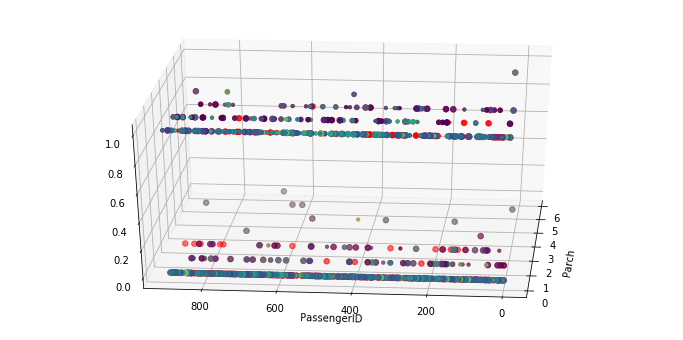

In [57]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

##The Red's points are the pronostics

ax.scatter(train_KNN['Parch'], train_KNN['PassengerId'], train_KNN['Survived'], c='red', s=train_KNN['Pclass']*10)
ax.scatter(df['Parch'], df['PassengerId'], df['Survived'], c=df['Age'], s=df['Pclass']*10)
plt.ylabel("PassengerID")
plt.xlabel("Parch")
plt.clabel("Survive")

ax.view_init(30, 185)
             
plt.show()
